# Transverse motion of n particles attached to n+1 springs in a series

In [1]:
import numpy as np 
from matplotlib import pyplot as plt
from matplotlib.animation import FuncAnimation
%matplotlib notebook

In [2]:
#functions defining the forces experienced by the particles
def new_axls(Ts,y,a,ls,diffs,ms=1):
    rs=diffs/ls
    axls=[]
    
    for i in np.arange(len(ls)-1):
        T1=np.abs(Ts[i]*rs[i])
        T2=np.abs(Ts[i+1]*rs[i+1])
        
        if y[i]<y[i+1]:
            T1=-T1
        if y[i+1]>y[i+2]:
            T2=-T2
        acc=(T1+T2)/ms
        axls.append(acc)
        
    return np.array(axls)

def new_Ts_n(k,ls,a):
    Ts=(ls-a)*k
    return Ts

def new_ls_n(y,a):    #n particles n+1 springs, n+1 ls, psis = 1+n+1
    ls=[]
    diffs=[]
    for i in np.arange(len(y)-1):
        diff=-y[i]+y[i+1]
        l=((y[i]-y[i+1])**2 +a**2)**0.5
        ls.append(l)
        diffs.append(diff)
    return np.array(ls),np.array(diffs)


In [17]:
#initial conditions ,the first and the last coordinates define the fixed points where the springs are attached to the wall
y=np.array([0,1,-1,1,-1,1,-1,1,0])
vs=np.array([0])
a=1
dt=0.01
k=1


In [18]:
 def data(k,a,y,vs):
    xs,ys,ac=[],[],[]
    
    for i in np.arange(10000):
        
        ls,diffs=new_ls_n(y,a)
        Ts=new_Ts_n(k,ls,a)
        axls=new_axls(Ts,y,a,ls,diffs)
        p = y[1:len(y)-1] + vs*dt 
        y=np.array([0]+list(p)+[0])

        vs = vs + axls*dt
       
        x=np.arange(0,len(y))

        xs.append(x)
        ys.append(y)
        ac.append(axls)
    return xs,ys,ac
xs,ys,ac=data(k,a,y,vs)

<IPython.core.display.Javascript object>


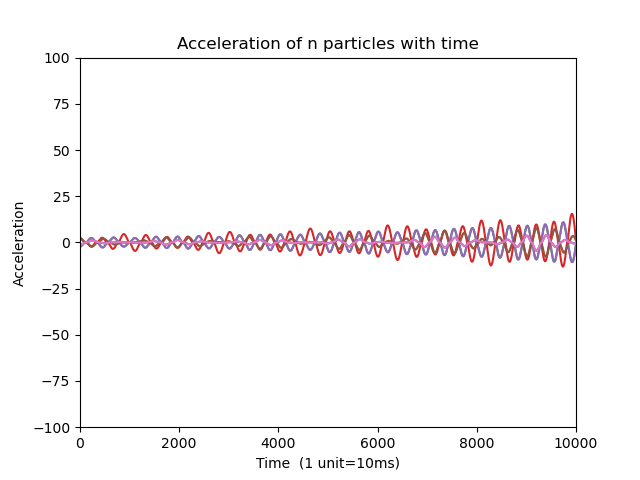

Text(0, 0.5, 'Acceleration')

In [19]:
plt.plot(ac)
plt.xlim(0,10000)
plt.ylim(-100,100)
plt.title("Acceleration of n particles with time")
plt.xlabel("Time  (1 unit=10ms)")
plt.ylabel("Acceleration")

<IPython.core.display.Javascript object>


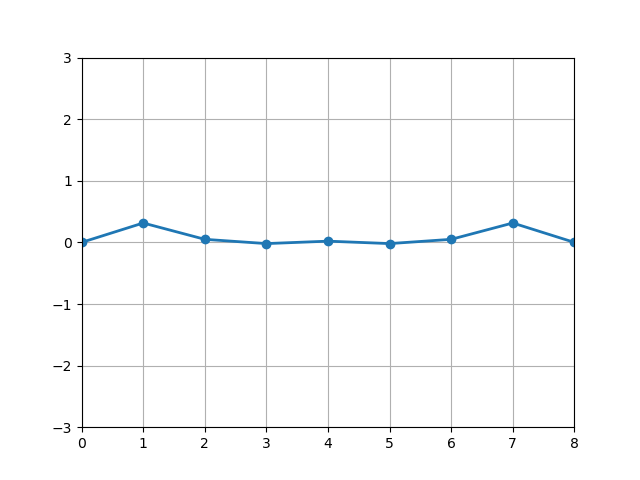

In [20]:
#Animation of system
fig=plt.figure()
ax = fig.add_subplot(111, aspect='equal', autoscale_on=False, xlim=(0, len(y)-1), ylim=(-3, 3))
ax.grid()
line, = ax.plot([], [],'o-', lw = 2)  
time_text = ax.text(0.02, 0.95, '', transform=ax.transAxes)  

def init():  

    line.set_data([], []) 
    time_text.set_text('')
    return line,time_text

def animate(i): 
    
    line.set_data(xs[i],ys[i])
    time_text.set_text('time = %.1f' % i*dt)
    return line,time_text

anim = FuncAnimation(fig, animate, init_func = init, frames = 10000, interval = 10, blit = True) 
fig.show()

# General motion of n particle spring mass system

In [24]:
#Functions defining x and y accelerations of n particles
def yaxls(Ts,psis,ls,diffs,ms=1):
    rs=diffs/ls
    axls=[]
    
    for i in np.arange(len(ls)-1):
        T1=np.abs(Ts[i]*rs[i])
        T2=np.abs(Ts[i+1]*rs[i+1])
        
        if psis[i]<psis[i+1]:
            T1=-T1
        if psis[i+1]>psis[i+2]:
            T2=-T2
        acc=(T1+T2)/ms
        axls.append(acc)
        
    return np.array(axls)

def xaxls(Ts,xs,ls,diffs,ms=1):
    rs=diffs/ls
    axls=[]
    
    for i in np.arange(len(ls)-1):
        T1=Ts[i]*np.abs(rs[i])
        T2=Ts[i+1]*np.abs(rs[i+1])
        
        acc=(T2-T1)/ms
        axls.append(acc)
        
    return np.array(axls)

def new_Ts_n(k,ls,a):
    
    Ts=(ls-a)*k
    return Ts

def new_ls_n(ys,xs):    #n particles n+1 springs, n+1 ls, psis = 1+n+1
    ls=[]
    x_diffs,y_diffs=[],[]
    for i in np.arange(len(ys)-1):
        y_diff=-ys[i]+ys[i+1]
        x_diff=-xs[i]+xs[i+1]
        l=(y_diff**2 +x_diff**2)**0.5
        ls.append(l)
        y_diffs.append(y_diff),x_diffs.append(x_diff)
    return np.array(ls),np.array(y_diffs),np.array(x_diffs)


In [35]:
#initial conditions, the first and the last coordinates define the fixed points where the springs are attached to the wall
ys=np.array([0,2,2,2,2,2,0])
xs=np.array([0,1,2,3,4,5,6])
xvs=np.array([0])
yvs=np.array([0])
a=1
dt=0.01
k=1

In [36]:
#Function to generate data points
def data(k,a,xs,ys,xvs,yvs):
    xss,yss=[],[]
    
    for i in np.arange(10000):
        
        ls,yd,xd=new_ls_n(ys,xs)
        Ts=new_Ts_n(k,ls,a)
        xas=xaxls(Ts,xs,ls,xd)
        yas=yaxls(Ts,ys,ls,yd)
        
        c1 = ys[1:len(ys)-1] + yvs*dt
        c2 = xs[1:len(xs)-1] + xvs*dt
        
        ys=np.array([0]+list(c1)+[0])
        xs=np.array([0]+list(c2)+[xs[len(xs)-1]])


        yvs = yvs + yas*dt
        xvs = xvs + xas*dt
       
        xss.append(xs)
        yss.append(ys)
    return xss,yss
xss,yss=data(k,a,xs,ys,xvs,yvs)

<IPython.core.display.Javascript object>


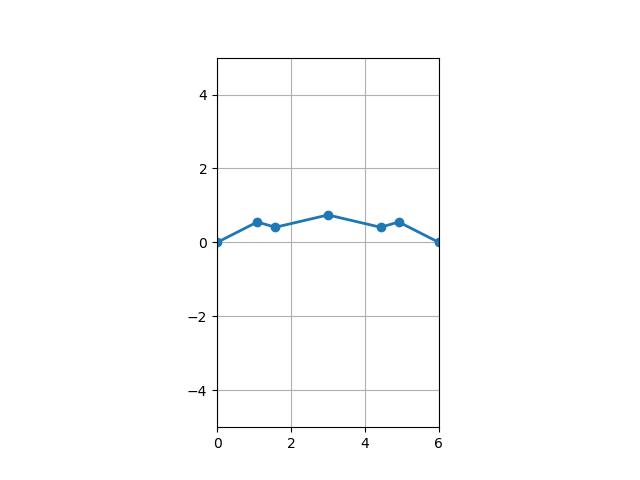

In [37]:
#Animation
fig=plt.figure()
ax = fig.add_subplot(111, aspect='equal', autoscale_on=False, xlim=(0, len(xs)-1), ylim=(-5, 5))
ax.grid()
line, = ax.plot([], [],'o-', lw = 2)  
time_text = ax.text(0.02, 0.95, '', transform=ax.transAxes)  

def init():  

    line.set_data([], []) 
    time_text.set_text('')
    return line,time_text

def animate(i): 
    
    line.set_data(xss[i],yss[i])
    time_text.set_text('time = %.1f' % i*dt)
    return line,time_text

anim = FuncAnimation(fig, animate, init_func = init, frames = 10000, interval = 1, blit = True) 
fig.show()